## Titanic ETL Pipeline

## Step 1. Importing Necessary Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
print("All libraries loaded successfully!")


All libraries loaded successfully!


## Step 2. Load Dataset (Extract)

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 ## Step 3. Check Missing Values

In [7]:
# Missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


 ## Step 4. Data Cleaning (Transform)

In [8]:
# Drop unnecessary columns
data_cleaned = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Show updated dataset
data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Step 5. Build Preprocessing Pipeline

In [9]:
# Define feature groups
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])

print("Preprocessing pipeline is ready!")


Preprocessing pipeline is ready!


## Step 6. Apply Pipeline (Transform)

In [10]:
# Apply the preprocessing pipeline (fit and transform)
processed_data = preprocessor.fit_transform(data_cleaned)

# Check the shape of the processed data
print(f"Processed data shape: {processed_data.shape}")

Processed data shape: (891, 12)


## Step 7. Save Processed Data (Load)

In [11]:
# Convert the processed data (NumPy array) to DataFrame
# Some transformers like OneHotEncoder return sparse matrix, so we check and convert if needed
if hasattr(processed_data, 'toarray'):
    processed_array = processed_data.toarray()
else:
    processed_array = processed_data

processed_df = pd.DataFrame(processed_array)

# Save to CSV
processed_df.to_csv('processed_titanic.csv', index=False)

print("✅ Processed data saved successfully as 'processed_titanic.csv'")

✅ Processed data saved successfully as 'processed_titanic.csv'


## Step 8. Data Visualization (EDA)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

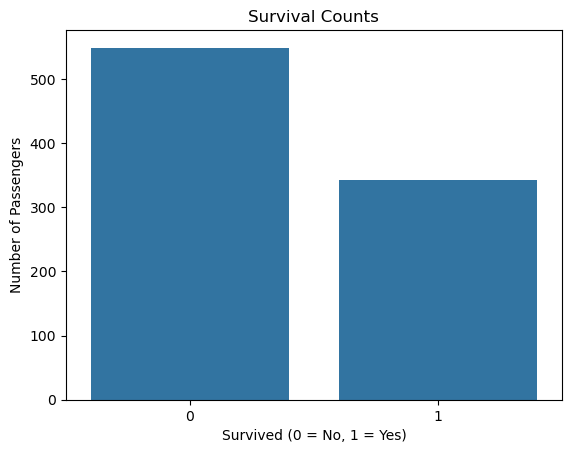

In [15]:
sns.countplot(x='Survived', data=data_cleaned)
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()

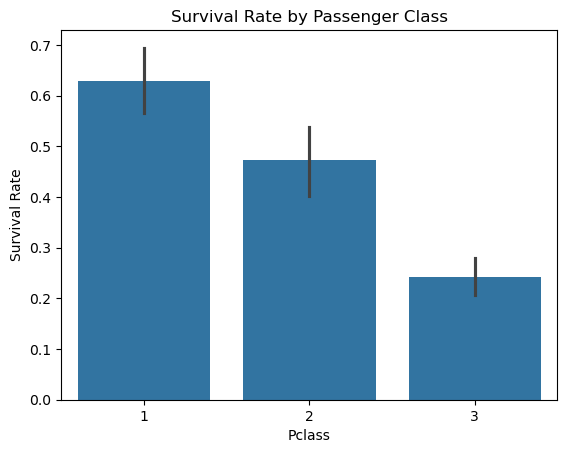

In [16]:
# Bar plot: Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

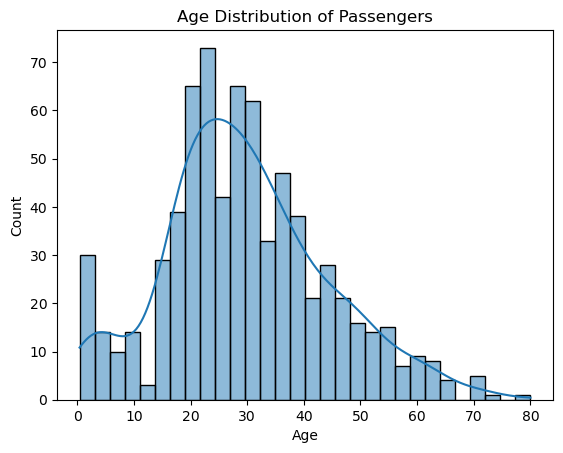

In [17]:
# Histogram: Age distribution
sns.histplot(data_cleaned['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

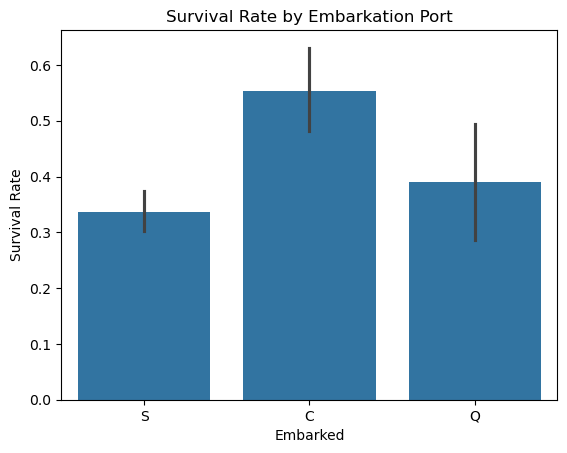

In [18]:
# Bar plot: Survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=data_cleaned)
plt.title('Survival Rate by Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

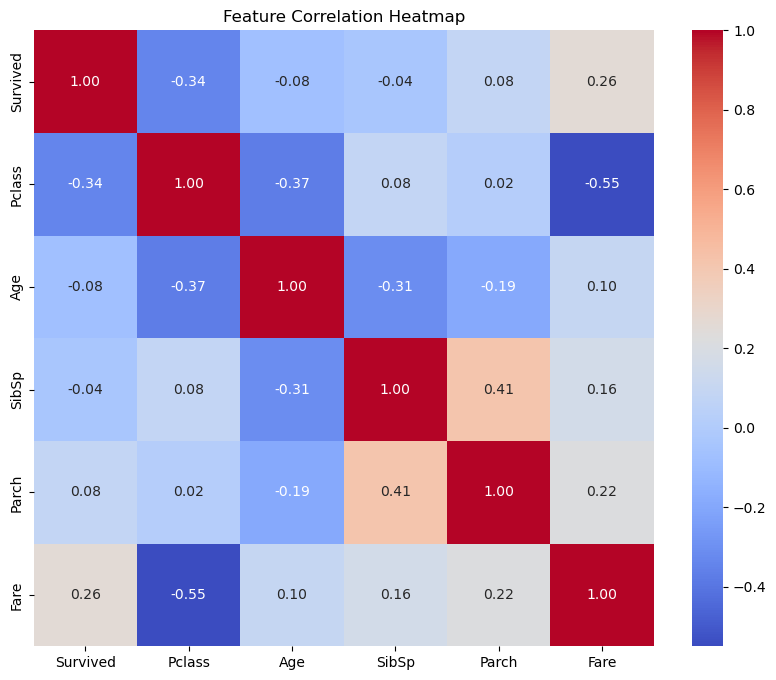

In [20]:
# Select only numerical columns
numerical_data = data_cleaned.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


# 📄Task 1: Titanic Dataset - Summary & Conclusion
🔍 Summary of Key Insights:

Survival Distribution: A higher number of passengers did not survive compared to those who did. This indicates a survival rate of less than 40%.

Class and Survival: Passengers in 1st class had the highest survival rate, followed by 2nd and 3rd class. Socioeconomic status played a significant role in survival likelihood.

Age Distribution: The majority of passengers were between 20 and 40 years old. Very few elderly passengers were on board, and children had varied outcomes depending on other factors like class or family.

Embarkation Port: Passengers who boarded from Cherbourg (C) had a higher survival rate compared to Southampton (S) and Queenstown (Q).

Feature Correlation:

Fare showed a positive correlation with survival, indicating passengers who paid more (likely in higher classes) had better chances.

Pclass showed a negative correlation, reinforcing that lower-class passengers faced worse outcomes.

Age and SibSp (siblings/spouses aboard) showed weak correlations with survival.

# ✅ Conclusion:

This analysis revealed that survival on the Titanic was influenced by class, embarkation point, and fare paid, highlighting social inequalities of that time. Higher-class passengers, especially those who embarked from Cherbourg, had a higher chance of survival. This exploratory data analysis can serve as a foundation for building predictive models on survival likelihood.

